## Logistic Regression base on Mini-Batch Gradient Descent with Earning Stopping

[[-0.05146968  0.44419863]
 [ 1.03201691 -0.41974116]
 [ 0.86789186 -0.25482711]
 [ 0.288851   -0.44866862]
 [-0.83343911  0.53505665]]
[1 1 1 1 0]


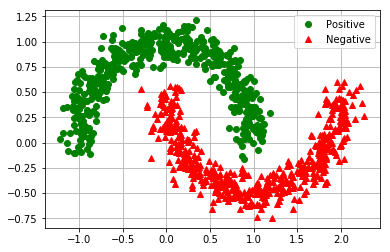

X_shape: (1000, 2)  y_shape: (1000,)
CPU times: user 222 ms, sys: 16.6 ms, total: 239 ms
Wall time: 311 ms


In [2]:
%%time
# ===============================================================
# Logistic Regression base on Mini-Batch Gradient Descent with Earning Stopping
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'go', label='Positive') # [y==0]布尔索引
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^', label='Negative')
    plt.grid(True, which='both')
    plt.legend()
    plt.show()
    
m = 1000    
X, y = make_moons(n_samples=m, noise=0.1, random_state=42)
print(X[:5], y[:5], sep='\n')
plot_dataset(X, y)

print('X_shape:', X.shape, ' y_shape:', y.shape)

In [3]:
X_with_bais = np.c_[np.ones(shape=(m, 1)), X] #将(m, 1)的列向量横向拼接到X上 (1000, 3) 
y_vector = y.reshape(-1, 1) # 将y转置成m*1的行向量 (1000, 1)

print('shape of X_with_bais:', X_with_bais.shape)
print('shape of y:', y_vector.shape)
print('head sample of X_with_bias\n', X_with_bais[:5])
print('head label of y:', y[:5])

X_train, X_test, y_train, y_test = train_test_split(X_with_bais, y_vector, test_size=0.2)
print('shape of train set:', X_train.shape, y_train.shape)
print('shape of test set:', X_test.shape, y_test.shape)

shape of X_with_bais: (1000, 3)
shape of y: (1000, 1)
head sample of X_with_bias
 [[ 1.         -0.05146968  0.44419863]
 [ 1.          1.03201691 -0.41974116]
 [ 1.          0.86789186 -0.25482711]
 [ 1.          0.288851   -0.44866862]
 [ 1.         -0.83343911  0.53505665]]
head label of y: [1 1 1 1 0]
shape of train set: (800, 3) (800, 1)
shape of test set: (200, 3) (200, 1)


In [5]:
def random_batch(X_train, y_train, batch_size): # 返回小批量训练数据
    rnd_idx = np.random.randint(0, len(X_train), size=batch_size) # pick batch_size's from Train Set
    return X_train[rnd_idx], y_train[rnd_idx]

tf.reset_default_graph()
n_inputs = 2
n_features = n_inputs + 1

X = tf.placeholder(tf.float32, shape=(None, n_features), name='inMatrix')
y = tf.placeholder(tf.float32, shape=(None, 1), name='labels')

theta = tf.Variable(tf.random_uniform([n_features, 1], maxval=1.0, minval=-1.0), name='theta')
# 在[-1,1]之间截断正态分布填充shape为(n_features, 1)

logits = tf.matmul(X, theta, name='logits') # X * theta
# y_prob = 1 / (1 + tf.exp(-logits))
y_prob = tf.sigmoid(logits) # TensorFlow has sigmoid function 

# epsilon = 1e-07
# loss = -tf.reduce_mean(y * tf.log(y_prob + epsilon) + (1 - y) * tf.log(1 - y_prob + epsilon))
loss = tf.losses.log_loss(y, y_prob) # 标签，预测概率
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss) # 训练操作：最小化loss函数

init = tf.global_variables_initializer()

In [6]:
%%time
n_epochs = 2000
batch_size = 50
n_batchs = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs): # Mini-batch SGD
        for batch_index in range(n_batchs):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        loss_val = loss.eval(feed_dict={X:X_test, y:y_test})
        if not epoch % 100:
            print('Epoch-{} <==================> loss: {}'.format(str(epoch).zfill(4), loss_val))
            
    y_probal_val = y_prob.eval(feed_dict={X:X_test, y:y_test})
    y_pred = y_probal_val > 0.5
    print("Sample Test")
    print('the probility of predictions:   ', y_probal_val[:5].flatten())
    print('the predicted label:\t\t', y_pred[:5].flatten())

Epoch-0000 <==================> loss: 0.835253894329071
Epoch-0100 <==================> loss: 0.28921833634376526
Epoch-0200 <==================> loss: 0.25523313879966736
Epoch-0300 <==================> loss: 0.24336601793766022
Epoch-0400 <==================> loss: 0.23599135875701904
Epoch-0500 <==================> loss: 0.23291009664535522
Epoch-0600 <==================> loss: 0.23022541403770447
Epoch-0700 <==================> loss: 0.22781918942928314
Epoch-0800 <==================> loss: 0.22614896297454834
Epoch-0900 <==================> loss: 0.22550489008426666
Epoch-1000 <==================> loss: 0.2244759351015091
Epoch-1100 <==================> loss: 0.22392143309116364
Epoch-1200 <==================> loss: 0.2236623764038086
Epoch-1300 <==================> loss: 0.22274713218212128
Epoch-1400 <==================> loss: 0.223139688372612
Epoch-1500 <==================> loss: 0.22190231084823608
Epoch-1600 <==================> loss: 0.2228306233882904
Epoch-1700 <=========

In [7]:
from sklearn.metrics import classification_report, precision_score, recall_score

print('查全率：', precision_score(y_test, y_pred))
print('召回率：', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

查全率： 0.8383838383838383
召回率： 0.9540229885057471
             precision    recall  f1-score   support

          0       0.96      0.86      0.91       113
          1       0.84      0.95      0.89        87

avg / total       0.91      0.90      0.90       200



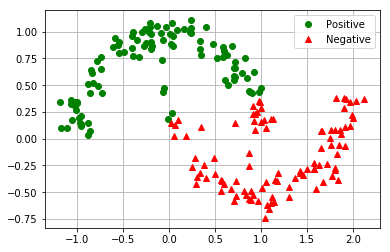

In [8]:
plot_dataset(np.delete(X_test, 0, axis=1), y_pred.reshape(-1))
# 线性决策边界决定了其在两个半圆边界无法很好的预测，可以尝试添加高次特征

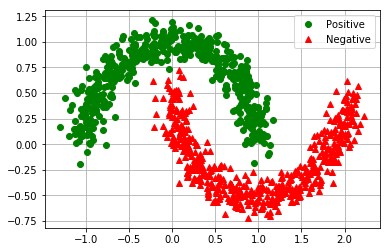

X_shape: (1000, 2)  y_shape: (1000,)
shape of y: (1000, 1)
head label of y: [1 0 1 1 1]
shape of X_train_enhanced: (800, 10)
head sample of X_train_enhanced
 [ 1.00000000e+00 -3.89401896e-02  5.50011057e-01  1.51633837e-03
 -2.14175348e-02  3.02512163e-01 -5.90465036e-05  8.34002868e-04
 -1.17798810e-02  1.66385034e-01  1.00000000e+00 -2.06024276e-02
  3.83035970e-01  4.24460021e-04 -7.89147082e-03  1.46716554e-01
 -8.74490684e-06  1.62583456e-04 -3.02271718e-03  5.61977176e-02
  1.00000000e+00  9.68474666e-02  1.32369249e-01  9.37943179e-03
  1.28196264e-02  1.75216180e-02  9.08374207e-04  1.24154834e-03
  1.69692432e-03  2.31932342e-03  1.00000000e+00 -8.90615572e-01
  7.04205802e-01  7.93196096e-01 -6.27176653e-01  4.95905811e-01
 -7.06432795e-01  5.58573293e-01 -4.41661438e-01  3.49219749e-01
  1.00000000e+00 -2.07159927e-01  1.10961812e+00  4.29152352e-02
 -2.29868409e-01  1.23125237e+00 -8.89031697e-03  4.76195226e-02
 -2.55066152e-01  1.36621995e+00]
shape of X_train_enhanced se

In [9]:
%%time
# ===============================================================
# Logistic Regression base on Mini-Batch Gradient Descent with Earning Stopping

import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.preprocessing import PolynomialFeatures

def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'go', label='Positive')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^', label='Negative')
    plt.grid(True, which='both')
    plt.legend()

m = 1000    
X, y = make_moons(n_samples=m, noise=0.1)
plot_dataset(X, y)
plt.show()
print('X_shape:', X.shape, ' y_shape:', y.shape)

y_vector = y.reshape(-1, 1)

print('shape of y:', y_vector.shape)
print('head label of y:', y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y_vector, test_size=0.2)

degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_enhanced = np.c_[np.ones((X_train.shape[0],)), poly_features.fit_transform(X_train)]
X_test_enhanced = np.c_[np.ones((X_test.shape[0],)), poly_features.fit_transform(X_test)]

print('shape of X_train_enhanced:', X_train_enhanced.shape)
print('head sample of X_train_enhanced\n', X_train_enhanced[:5].flatten())

print('shape of X_train_enhanced set:', X_train_enhanced.shape, y_train.shape)
print('shape of X_test_enhanced set:', X_test_enhanced.shape, y_test.shape)

def random_batch(X_train, y_train, batch_size):
    rnd_idx = np.random.randint(0, len(X_train),batch_size) # pick batch_size from Train Set
    return X_train[rnd_idx], y_train[rnd_idx]

tf.reset_default_graph()
n_inputs = 9
n_features = n_inputs + 1

X = tf.placeholder(tf.float32, shape=(None, n_features), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')
theta = tf.Variable(tf.random_uniform([n_features, 1], maxval=1.0, minval=-1.0), name='theta')
logits = tf.matmul(X, theta, name='logits')
# y_prob = 1 / (1 + tf.exp(-logits))
y_prob = tf.sigmoid(logits) # TensorFlow has sigmoid function 

epsilon = 1e-07
# loss = -tf.reduce_mean(y * tf.log(y_prob + epsilon) + (1 - y) * tf.log(1 - y_prob + epsilon))
loss = tf.losses.log_loss(y, y_prob)
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

n_epochs = 3000
batch_size = 50
n_batchs = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batchs):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        loss_val = loss.eval(feed_dict={X:X_test_enhanced, y:y_test})
        if not epoch % 100:
            print('Epoch-{} <==================> loss: {}'.format(str(epoch).zfill(4), loss_val))
    y_probal_val = y_prob.eval(feed_dict={X:X_test_enhanced, y:y_test})

精确率： 0.9905660377358491
召回率： 1.0
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        95
          1       0.99      1.00      1.00       105

avg / total       1.00      0.99      0.99       200



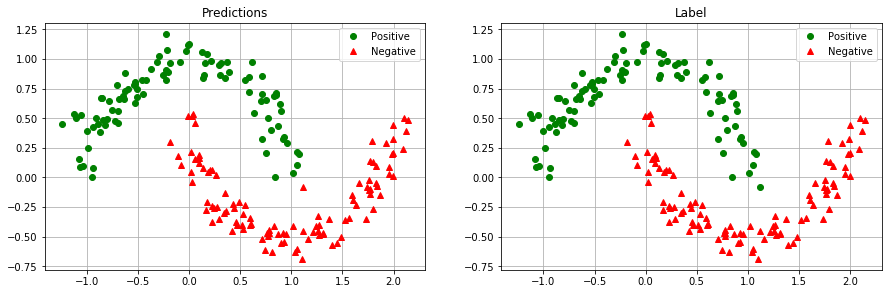

In [10]:
from sklearn.metrics import classification_report, precision_score, recall_score

y_pred = y_probal_val >= 0.5
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Predictions')
plot_dataset(X_test, y_pred.reshape(-1))

plt.subplot(222)
plt.title('Label')
plot_dataset(X_test, y_test.reshape(-1))
    
print('精确率：', precision_score(y_test, y_pred))
print('召回率：', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

整合成模块

In [11]:
import tensorflow as tf

def logistic_regression(X, y, initializer=None, lr=0.01):
    n_input_with_bias = int(X.shape[1])
    with tf.name_scope('logistic_regression'):  # 任务空间
        with tf.name_scope('model'): # 模型空间
            if initializer is None: # 初始化器为空
                initializer = tf.random_uniform([n_input_with_bias, 1], maxval=1.0, minval=-1.0, name='initializer')
            theta = tf.Variable(initializer, name='theta') 
            logits = tf.matmul(X, theta, name='logits')
            y_prob = tf.sigmoid(logits)
        with tf.name_scope('train'): # 训练空间
            loss = tf.losses.log_loss(y, y_prob, scope='loss')
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope('init'): # 初始化空间
            init = tf.global_variables_initializer()
        with tf.name_scope('save'): # 日志空间
            saver = tf.train.Saver()
    return y_prob, loss, training_op, loss_summary, init, saver

In [12]:
from datetime import datetime

tf.reset_default_graph()
def log_dir(prefix=''):
    now = datetime.now().strftime("%Y年%m月%d日%H:%M:%S")
    root_logdir = './tmp/tf-logs'
    if prefix:
        prefix += '-'
    name = prefix + 'run-' + now
    path = '{}/{}'.format(root_logdir, name)
    return path
log_dir()

'./tmp/tf-logs/run-2018年09月11日21:23:07'

In [13]:
n_features = 10
logdir = log_dir('logreg')

X = tf.placeholder(tf.float32, shape=(None, n_features), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

y_prob, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)
File_writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph()) # 以此为界，下面的cell是运行流图

##### 为了做到脚本被打断仍可以继续执行，为每一个step设置checkpoint点， 记录其epoch

In [16]:
%%time
import os
from sklearn.metrics import classification_report

n_epochs = 4001
batch_size = 50
n_batch = int(np.ceil(m / batch_size))

checkpoint_path = './tmp/my_logreg_model.ckpt'
checkpoint_epoch_path = checkpoint_path + '.epoch' # 随模型单独存epoch step
final_model_path = './tmp/my_final_model'

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path): # 如果分步检查点存在则还原模型到分步状态
        with open(checkpoint_epoch_path, 'rb') as f:
            start_epoch = int(f.read())
        print("The model has been interrupted, Continue at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batchs):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X:X_test_enhanced, y:y_test})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X:X_batch, y:y_batch})
        # 分步loss值，分步日志
        File_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0: # 保存会话
            print("Epoch:", epoch, '\tLoss:', loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, 'wb') as f: # 写分步日志
                f.write(b'%d' % (epoch + 1)) # 写入二进制epoch
                
    saver.save(sess, final_model_path) # 保存最终模型
    y_prob_val = y_prob.eval(feed_dict={X:X_test_enhanced, y:y_test})
    os.remove(checkpoint_epoch_path) # 删除分布日志          
    print(classification_report(y_test, y_prob_val >= 0.5))

The model has been interrupted, Continue at epoch 1001
INFO:tensorflow:Restoring parameters from ./tmp/my_logreg_model.ckpt
Epoch: 1500 	Loss: 0.06392029
Epoch: 2000 	Loss: 0.058219694
Epoch: 2500 	Loss: 0.096432656
Epoch: 3000 	Loss: 0.0518257
Epoch: 3500 	Loss: 0.024947692
Epoch: 4000 	Loss: 0.04365389
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        95
          1       0.99      1.00      1.00       105

avg / total       1.00      0.99      0.99       200

CPU times: user 47.6 s, sys: 6.96 s, total: 54.6 s
Wall time: 33.9 s
